In [1]:
import numpy as np #https://numpy.org/
import pandas as pd #https://pandas.pydata.org/
import matplotlib.pyplot as plt #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html
import seaborn as sns
import random

In [2]:
class CFG():
    input_path="../input/tabular-playground-series-mar-2021/"
    debug=False
    fold_num=6
    seed=2

In [3]:
target_columns=['target']
def feature_columns(df):
    for col in df.columns:
        if col in target_columns:df=df.drop(columns=col)
    return  df.columns
def numerical_columns(df):
    return df[feature_columns(df)].select_dtypes(include=['int64','float64']).columns
def categorical_columns(df):
    return df[feature_columns(df)].select_dtypes(exclude=['int64','float64']).columns

In [4]:
class Color:
    BLACK     = '\033[30m'
    RED       = '\033[31m'
    GREEN     = '\033[32m'
    YELLOW    = '\033[33m'
    BLUE      = '\033[34m'
    PURPLE    = '\033[35m'
    CYAN      = '\033[36m'
    WHITE     = '\033[37m'

    _BLACK     = '\033[40m'
    _RED       = '\033[41m'
    _GREEN     = '\033[42m'
    _YELLOW    = '\033[43m'
    _BLUE      = '\033[44m'
    _PURPLE    = '\033[45m'
    _CYAN      = '\033[46m'
    _WHITE     = '\033[47m'

    END       = '\033[0m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'
    INVISIBLE = '\033[08m'
    REVERSE   = '\033[07m'

In [5]:
def what_is(obj):
    print("type:",type(obj))
    print("-"*40+"help"+"-"*40)
    print(help(obj))
    print("-"*40+"dir"+"-"*40)
    print(dir(obj))

import pandas_profiling
def simple_eda(df):
    """
    simple_eda
    """
    print("-"*40+"EDA"+"-"*40)
    print("type:",type(df))
    print("-"*40+"head"+"-"*40)
    display(df.head())
    print("-"*40+"describe"+"-"*40)
    display(df.describe())
    print("-"*40+"info"+"-"*40)
    print(df.info())

    #display(df.profile_report())

In [6]:
train=pd.read_csv(CFG.input_path+"train.csv",index_col='id')
test=pd.read_csv(CFG.input_path+"test.csv",index_col='id')
sample_submission=pd.read_csv(CFG.input_path+"sample_submission.csv",index_col='id')

if CFG.debug:
    train=train[:len(train)//200]
    test=test[:len(test)//200]

all_data = pd.concat([train,test])

In [7]:
simple_eda(train)

----------------------------------------EDA----------------------------------------
type: <class 'pandas.core.frame.DataFrame'>
----------------------------------------head----------------------------------------


,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
id,,,,,,,,,,,,,,,,,,,,,
0,A,I,A,B,B,BI,A,S,Q,A,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,A,I,A,A,E,BI,K,W,AD,F,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,A,K,A,A,E,BI,A,E,BM,L,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,A,K,A,C,E,BI,A,Y,AD,F,...,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,A,I,G,B,E,BI,C,G,Q,A,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


----------------------------------------describe----------------------------------------


,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,0.504749,0.494073,0.516632,0.474235,0.504848,0.502257,0.488229,0.501739,0.488074,0.469496,0.508230,0.264870
std,0.206788,0.213037,0.214851,0.216636,0.227474,0.241243,0.211335,0.203496,0.179048,0.194516,0.203393,0.441265
min,-0.049562,0.084480,0.094493,-0.045316,0.168071,-0.036379,0.005199,0.090901,0.024139,0.214866,0.097789,0.000000
25%,0.344985,0.317363,0.326047,0.292249,0.279303,0.276442,0.323914,0.353054,0.358915,0.309934,0.368312,0.000000
50%,0.479650,0.463170,0.471247,0.387564,0.479858,0.554768,0.518089,0.435404,0.410908,0.407477,0.446576,0.000000
75%,0.637657,0.693992,0.704625,0.644950,0.725779,0.735225,0.608537,0.642023,0.612725,0.586793,0.581957,1.000000
max,1.004559,1.009958,1.016600,0.952187,0.858578,0.853022,0.966553,1.035818,1.055885,1.005652,1.011331,1.000000


----------------------------------------info----------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 0 to 499999
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cat0    300000 non-null  object 
 1   cat1    300000 non-null  object 
 2   cat2    300000 non-null  object 
 3   cat3    300000 non-null  object 
 4   cat4    300000 non-null  object 
 5   cat5    300000 non-null  object 
 6   cat6    300000 non-null  object 
 7   cat7    300000 non-null  object 
 8   cat8    300000 non-null  object 
 9   cat9    300000 non-null  object 
 10  cat10   300000 non-null  object 
 11  cat11   300000 non-null  object 
 12  cat12   300000 non-null  object 
 13  cat13   300000 non-null  object 
 14  cat14   300000 non-null  object 
 15  cat15   300000 non-null  object 
 16  cat16   300000 non-null  object 
 17  cat17   300000 non-null  object 
 18  cat18   300000 non-null  object 
 19  c

In [8]:
all_data=pd.get_dummies(all_data)

In [9]:
train=all_data[:len(train)]
test=all_data[len(train):]

In [10]:
# corr = train.corr().target
# corr.plot.bar()


In [11]:
#all_data=all_data[corr[abs(corr)>0.03].index]

In [12]:
train

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,...,cat16_C,cat16_D,cat17_A,cat17_B,cat17_C,cat17_D,cat18_A,cat18_B,cat18_C,cat18_D
id,,,,,,,,,,,,,,,,,,,,,
0,0.629858,0.855349,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,...,0,1,0,0,0,1,0,1,0,0
1,0.370727,0.328929,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,...,0,0,0,0,0,1,0,1,0,0
2,0.502272,0.322749,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,...,0,1,0,0,0,1,0,1,0,0
3,0.934242,0.707663,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,...,0,1,0,0,0,1,0,1,0,0
4,0.254427,0.274514,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499993,0.681700,0.500730,0.662428,0.671927,0.390566,0.145840,0.262767,0.514248,0.519340,0.617436,...,0,0,0,0,0,1,0,1,0,0
499995,0.489226,0.790664,0.821657,0.620356,0.384891,0.735879,0.547731,0.726653,0.470575,0.275743,...,0,1,0,0,0,1,0,1,0,0
499996,0.487882,0.522347,0.407037,0.232436,0.832482,0.810663,0.596939,0.308821,0.373997,0.518024,...,0,0,0,0,0,1,0,0,0,1


In [13]:
from sklearn.metrics import roc_curve,auc
def get_score(y_pred,y):

    fpr, tpr, thresholds = roc_curve(y, y_pred)
    score = auc(fpr, tpr)
    
    # ROC曲線をプロット
    plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%score)
    plt.legend()
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)
    
    return score

In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# from tqdm.notebook import tqdm #peogress bar

def cross_validation(X,y,model,test_X=None,NUM_FOLDS=CFG.fold_num,nn=False,model_func=None,model_name='model'):

    kf = KFold(n_splits=NUM_FOLDS, shuffle=False)#,random_state=CFG.seed)
    
    scores=[]#scoreの配列

    test_preds = [0]*len(test_X)#各foldのmodelでのtest_Xに対する予測結果の平均

    stack_training = pd.DataFrame(index=X.index,columns=[model_name])
        
    for fold_cnt, (tr_idx, val_idx) in enumerate(kf.split(X,y)):
            
        #tqdm(enumerate(kf.split(x, y))):
            
        print(f"FOLD:{fold_cnt}")
        #print(tr_idx,val_idx)

        tr_x, tr_y = X.iloc[tr_idx] , y.iloc[tr_idx]
        va_x, va_y = X.iloc[val_idx], y.iloc[val_idx]

        tr_y=np.ravel(tr_y)#reshape 1d

        if nn:model=model_func()

        model.fit(tr_x, tr_y)

        #temp_oof = model.predict(va_x)
        pre=model.predict(va_x)

        #stack用
        # print(val_idx)
        # print(va_y)
        
        pre=pd.DataFrame(pre,index=va_y.index)
        # print(pre)

        #stack_training['y'].loc[val_idx]=va_y['target']
        stack_training[model_name].iloc[val_idx]=pre[0].ravel()

        score=get_score(pre, va_y)
        print(Color.GREEN,score,Color.END,sep='')
        scores.append(score)

        test_preds += model.predict(test_X).ravel()/NUM_FOLDS

    
    print("ave:",np.average(scores))

    # a=cross_val_score(model,X,y,scoring='roc_auc',cv=5)
    # print(a)
    #return np.average(scores)
    plt.show()
    return test_preds,stack_training

In [15]:
from sklearn.linear_model import Ridge
ridge_params = {
    'alpha': 100,
    'max_iter':200,
}
#0.8793504203807672

In [16]:
from sklearn.linear_model import LassoCV
lasso_params = {
    'alphas':[0.001],
    'eps':0.001
}
#0.8787216530983532

In [17]:

from xgboost import XGBRegressor

xgb_params = {
    # 'booster':'gbtree',
    'n_estimators':800,
    'max_depth':5,
    'eta':0.01,
    # 'num_boost_round':1000,
    # 'early_stopping_rounds':50,
    #'min_child_weight':1,
    # 'alpha':0,
    # 'lambda':1,
    # 'subsample':0.9,

    'eval_metric':'auc',
    'seed': CFG.seed,
    # 'tree_method':'gpu_hist',
    # 'gpu_id':0

    #------------------------

    # "objective": "binary:logistic",
    # "grow_policy":"lossguide",
    # "min_child_weight":20,
    # 'colsample_bytree':0.3,
    # 'subsample':0.7,
    # 'n_estimators':5000,
    # 'learning_rate':0.1

}
#0.879674189877916

In [18]:
from sklearn.ensemble import RandomForestRegressor
random_forest_params = {
    'n_estimators': 200,
    #'criterion':'mae',
    'max_depth':13,
    #'min_samples_split':5,
}
#0.8726983472089088

In [19]:
from lightgbm import LGBMRegressor

lgbm_params = {
    'n_estimators':400,
    'max_depth':2, 
    'learning_rate':0.1,
    'num_leaves':5,
    # 'verbosity':0,
    # 'subsample':0.75,
    # 'colsample_bytree':0.35,
    # 'reg_lambda':0.23,
    # 'reg_alpha':0.52,
    # 'scale_pos_weight':1,
    # 'eval_metric':'auc',
    # 'seed': 42,
    # 'tree_method':'gpu_hist',
    # 'gpu_id':0
}
#0.881411919700458

In [20]:
from catboost import CatBoostRegressor

catboost_params = {
    'iterations':2000,
    'learning_rate':0.02,
    'l2_leaf_reg':3.0,
    'loss_function':'RMSE',
    'verbose':0,
}
#0.8824881663770014

In [21]:
#AutoML pycaretやる
#stackingやってみる
#NN動かす

In [22]:

# from sklearn.model_selection import GridSearchCV
# parameters = {

#     'n_estimators':[200],
#     #'criterion':['mse', 'mae'],

#     'max_depth':[13,20,50],
#     # 'min_samples_split':5,
# }

# clf = GridSearchCV(RandomForestRegressor(), parameters,cv=4)
# clf.fit(train[feature_columns(train)], train[target_columns])

In [23]:
# clf.get_params().keys()

In [24]:
# clf.best_params_

In [25]:
# clf.best_score_

In [26]:
# import optuna

# # Define an objective function to be minimized.
# def objective(trial):

#     # Invoke suggest methods of a Trial object to generate hyperparameters.
#     regressor_name = trial.suggest_categorical('classifier', ['xgb'])
#     if regressor_name == 'xgb':
#         n_estimators = trial.suggest_int('n_estimators', 100,20000)
#         max_depth = trial.suggest_int('max_depth', 2,10)
#         eta = trial.suggest_float('eta', 0.001,1)
#         gamma = trial.suggest_float('gamma', 1,2)
#         subsample = trial.suggest_float('subsample',0.1,0.9)
#         regressor_obj = XGBRegressor(
#             n_estimators=n_estimators,
#             max_depth=max_depth,
#             eta=eta,
#             gamma=gamma,
#             subsample=subsample,
#             eval_metric='auc',
#             early_stopping_rounds=100
#             #eval_metric='auc',
#         )
#     else:
#         n_estimators = trial.suggest_int('n_estimators', 2, 32)
#         regressor_obj = RandomForestRegressor(n_estimators=n_estimators)

#     # X, y = sklearn.datasets.load_boston(return_X_y=True)
#     # X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X, y, random_state=0)

#     # regressor_obj.fit(X_train, y_train)
#     # y_pred = regressor_obj.predict(X_val)

#     # error = sklearn.metrics.mean_squared_error(y_val, y_pred)

#     #return error  # An objective value linked with the Trial object.
#     return cross_validation(train[feature_columns],train[target_columns],regressor_obj)

# study = optuna.create_study(direction='maximize')  # Create a new study.
# study.optimize(objective, n_trials=50)  # Invoke optimization of the objective function.

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation


def make_nn():
        
    model=Sequential(
        [
            Dense(128,input_dim=train[feature_columns(train)].shape[1],activation='sigmoid'),
            #Dense(64,activation='sigmoid'),
            Dense(1,activation='sigmoid')
        ]
    )

    model.compile(
        loss='binary_crossentropy',
        optimizer='Adam',
        metrics=['AUC'],
    )

    #model.summary()
    return model

In [28]:
# # from sklearn.model_selection import KFold
# # from sklearn.model_selection import cross_val_score

# # from tqdm.notebook import tqdm #peogress bar

# def cross_validation_nn(X,y,test_X=None,NUM_FOLDS=5):

#     kf = KFold(n_splits=NUM_FOLDS, shuffle=True,random_state=CFG.seed)
    
#     scores=[]
#     test_preds = np.zeros(len(test_X))
        
#     for fold_cnt, (tr_idx, val_idx) in enumerate(kf.split(X,y)):
            
#         #tqdm(enumerate(kf.split(x, y))):
            
#         print(f"FOLD:{fold_cnt}")
#         #print(tr_idx,val_idx)

#         tr_x, va_x = X.iloc[tr_idx][:], X.iloc[val_idx][:]
#         tr_y, va_y = y.iloc[tr_idx][:], y.iloc[val_idx][:]


#         tr_y=np.ravel(tr_y)#reshape 1d

#         model=make_nn()

#         model.fit(tr_x, tr_y)

#         #temp_oof = model.predict(va_x)
#         pre=model.predict(va_x)

#         score=get_score(pre, va_y)
#         print(Color.GREEN,score,Color.END,sep='')
#         scores.append(score)

#         a=model.predict(test_X).ravel()
#         print(a.shape)
#         print(test_preds.shape)
#         test_preds += (a/NUM_FOLDS)

#         print(test_preds)
    
#     print("ave:",np.average(scores))

#     # a=cross_val_score(model,X,y,scoring='roc_auc',cv=5)
#     # print(a)
#     #return np.average(scores)
#     return test_preds

In [29]:
#predictions['nn']=cross_validation(train[feature_columns(train)],train[target_columns],None,test[feature_columns(test)],nn=True,model_func=make_nn)


Ridge
FOLD:0
0.8830446171587061
FOLD:1
0.8800917364916563
FOLD:2
0.8800749363109786
FOLD:3
0.8778799891550244
FOLD:4
0.880310802635009
FOLD:5
0.879866606436031
ave: 0.8802114480312343


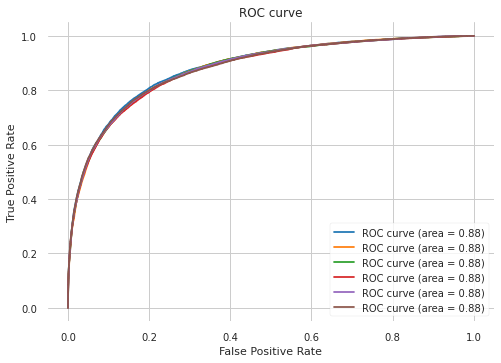

LassoCV
FOLD:0
0.8768017803754959
FOLD:1
0.8733057522451668
FOLD:2
0.8742109391498278
FOLD:3
0.8724766306138534
FOLD:4
0.8741329605063174
FOLD:5
0.8735966530531509
ave: 0.8740874526573021


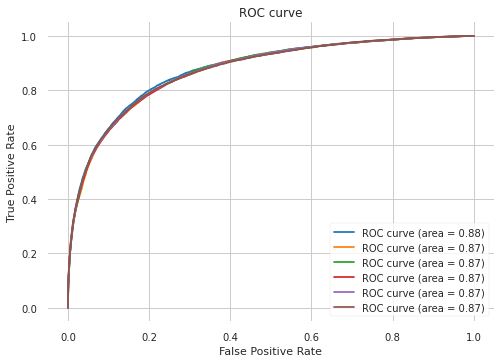

XGBRegressor
FOLD:0
0.8869199578770992
FOLD:1
0.8850539330063111
FOLD:2
0.8854791467175223
FOLD:3
0.8825291841488465
FOLD:4
0.884050773625186
FOLD:5
0.8839391140905124
ave: 0.8846620182442463


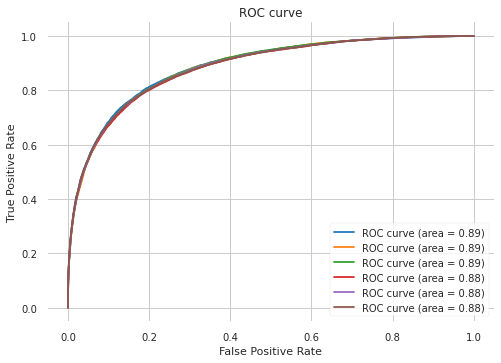

RandomForestRegressor
FOLD:0
0.8825433198154764
FOLD:1
0.8820337232655622
FOLD:2
0.8813204195107355
FOLD:3
0.8798177028864087
FOLD:4
0.880911440462975
FOLD:5
0.879637001202811
ave: 0.8810439345239948


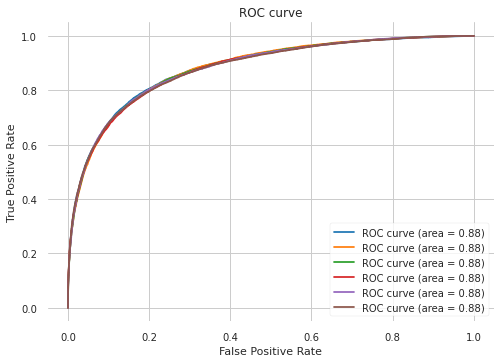

LGBMRegressor
FOLD:0
0.8855712717314421
FOLD:1
0.8828760226086287
FOLD:2
0.8833892131223698
FOLD:3
0.8803967746421987
FOLD:4
0.8822185690018651
FOLD:5
0.8819925834077845
ave: 0.8827407390857148


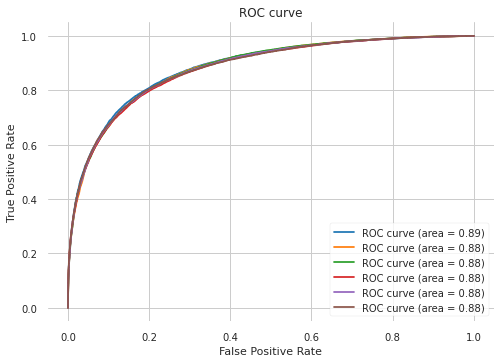

CatBoostRegressor
FOLD:0
0.8929912128845553
FOLD:1
0.891225987058738
FOLD:2
0.8908696980060389
FOLD:3
0.888271058213854
FOLD:4
0.8904644662559553
FOLD:5
0.8899274377489585
ave: 0.8906249766946832


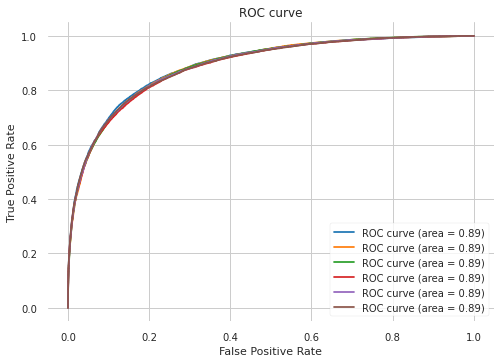

In [30]:
models=[
    Ridge(**ridge_params),
    LassoCV(**lasso_params),
    XGBRegressor(**xgb_params),
    RandomForestRegressor(**random_forest_params),
    LGBMRegressor(**lgbm_params),
    CatBoostRegressor(**catboost_params)
    ]
model_names=['Ridge',
'LassoCV',
'XGBRegressor',
'RandomForestRegressor',
'LGBMRegressor',
'CatBoostRegressor',
]

predictions=pd.DataFrame(index=test.index)
train_predictions=pd.DataFrame(index=train.index)

for idx,model in enumerate(models):
    print(model_names[idx])

    predictions[model_names[idx]],train_predictions[model_names[idx]]=cross_validation(train[feature_columns(train)],train[target_columns],model,test_X=test[feature_columns(test)],model_name=model_names[idx])


In [31]:
train_predictions['average']=train_predictions.mean(axis='columns')
train_predictions['target']=train.target
train_predictions

,Ridge,LassoCV,XGBRegressor,RandomForestRegressor,LGBMRegressor,CatBoostRegressor,average,target
id,,,,,,,,
0,0.197468,0.152750,0.109419,0.147158,0.138989,0.146582,0.148728,0.0
1,0.390083,0.450035,0.324114,0.282234,0.379161,0.379766,0.367566,0.0
2,0.063583,0.059876,0.060004,0.064855,0.039664,0.036573,0.054092,0.0
3,0.067273,0.122136,0.119307,0.126848,0.105821,0.108819,0.108367,0.0
4,0.283164,0.316882,0.221066,0.169881,0.266393,0.254470,0.251976,1.0
...,...,...,...,...,...,...,...,...
499993,0.487011,0.491699,0.460569,0.629892,0.411588,0.397002,0.479627,0.0
499995,0.278266,0.256144,0.298636,0.357302,0.233519,0.375527,0.299899,0.0
499996,1.001443,0.865248,0.962078,0.881030,0.989922,0.997807,0.949588,1.0


In [32]:
#predictions.index=test.index

predictions['average']=predictions.mean(axis='columns')
predictions

,Ridge,LassoCV,XGBRegressor,RandomForestRegressor,LGBMRegressor,CatBoostRegressor,average
id,,,,,,,
5,0.163533,0.112472,0.122979,0.113014,0.136957,0.141253,0.131701
6,0.517448,0.545354,0.562287,0.534061,0.563443,0.498362,0.536826
8,0.129102,0.152106,0.082424,0.065940,0.102418,0.043673,0.095944
9,0.229828,0.223118,0.162143,0.074224,0.186397,0.192943,0.178109
11,0.176846,0.189892,0.119926,0.122792,0.134762,0.128415,0.145439
...,...,...,...,...,...,...,...
499983,0.701767,0.695050,0.858207,0.775247,0.767397,0.838391,0.772676
499984,0.055144,0.035087,0.028039,0.028339,0.064633,0.029398,0.040106
499987,0.622523,0.687004,0.692100,0.682850,0.674786,0.677610,0.672812


In [33]:
# submission=pd.DataFrame(columns=['id','target'])

# submission.id=test.index
# # submission.target=(
# #     ridge_y_pred+
# #     #lasso_y_pred+
# #     xgb_y_pred+
# #     rf_y_pred+
# #     lgbm_y_pred+
# #     catboost_y_pred*3+
# #     nn_y+pred
# #     )/8
# submission.target=predictions.average.ravel()
# submission.to_csv("submission.csv",index=False)

# submission.head()

Ridge
FOLD:0
0.8934113465257143
FOLD:1
0.8921447534266982
FOLD:2
0.8914917771051102
FOLD:3
0.8890541324479377
FOLD:4
0.8912590029775521
FOLD:5
0.89050035196928
ave: 0.8913102274087153


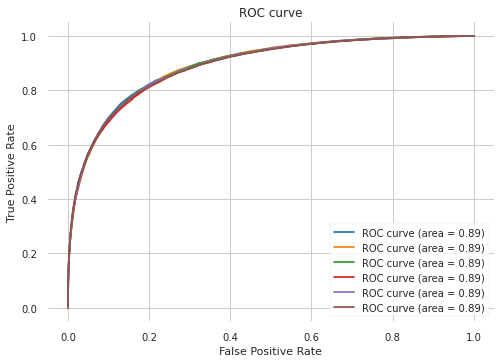

LassoCV
FOLD:0
0.8928822160367904
FOLD:1
0.891211890564575
FOLD:2
0.8908769376846001
FOLD:3
0.8883411631611368
FOLD:4
0.8904501325827514
FOLD:5
0.8898856552548585
ave: 0.8906079992141187


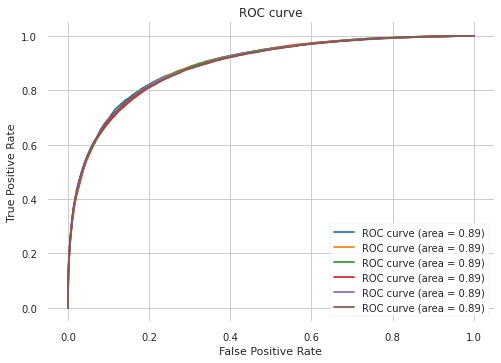

RandomForestRegressor
FOLD:0
0.8930712622721273
FOLD:1
0.8918871819082437
FOLD:2
0.8908994403233886
FOLD:3
0.888622857137279
FOLD:4
0.8906686108798904
FOLD:5
0.8899783289255003
ave: 0.890854613574405


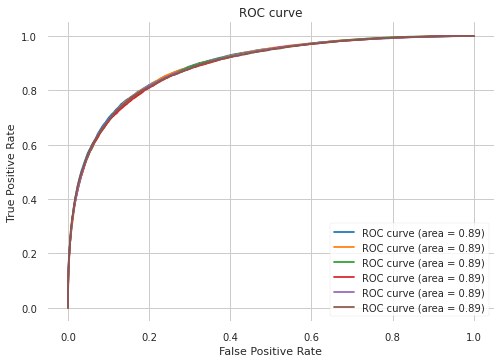

CatBoostRegressor
FOLD:0
0.8938144008769973
FOLD:1
0.8926969761048396
FOLD:2
0.8918609966410578
FOLD:3
0.8893870723760314
FOLD:4
0.8916692896253707
FOLD:5
0.8908080170786861
ave: 0.8917061254504972


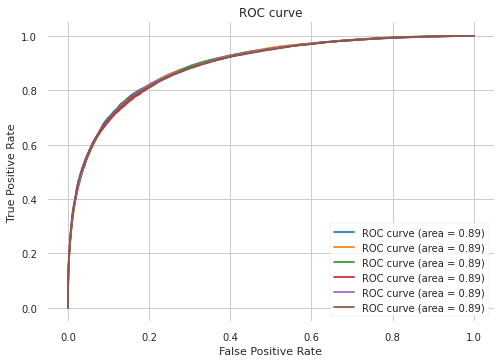

In [34]:
models=[
    Ridge(**ridge_params),
    LassoCV(**lasso_params),
    #XGBRegressor(**xgb_params),
    RandomForestRegressor(**random_forest_params),
    #LGBMRegressor(**lgbm_params),
    CatBoostRegressor(**catboost_params)
    ]

model_names=['Ridge',
'LassoCV',
#'XGBRegressor',
'RandomForestRegressor',
#'LGBMRegressor',
'CatBoostRegressor',
]

stack_predictions=pd.DataFrame(index=test.index,columns=model_names)

for idx,model in enumerate(models):
    print(model_names[idx])
    #if model_names[idx]!='RandomForestRegressor':continue

    stack_predictions[model_names[idx]],t=cross_validation(train_predictions[feature_columns(train_predictions)],train_predictions[target_columns],model,test_X=predictions,model_name=model_names[idx])

In [35]:
stack_predictions['average']=stack_predictions.mean(axis='columns')
stack_predictions

,Ridge,LassoCV,RandomForestRegressor,CatBoostRegressor,average
id,,,,,
5,0.146653,0.138047,0.158743,0.155713,0.149789
6,0.485825,0.503126,0.467195,0.421335,0.469370
8,0.026095,0.044011,0.041819,0.038833,0.037690
9,0.164040,0.182495,0.194148,0.187866,0.182137
11,0.119797,0.127019,0.114867,0.115211,0.119223
...,...,...,...,...,...
499983,0.845658,0.837298,0.843442,0.866294,0.848173
499984,0.026141,0.027669,0.018145,0.018111,0.022517
499987,0.667340,0.681109,0.644237,0.617676,0.652591


In [36]:
submission=pd.DataFrame(columns=['id','target'])

submission.id=test.index
submission.target=stack_predictions.average.ravel()
submission.to_csv("submission.csv",index=False)

submission

,id,target
0,5,0.149789
1,6,0.469370
2,8,0.037690
3,9,0.182137
4,11,0.119223
...,...,...
199995,499983,0.848173
199996,499984,0.022517
199997,499987,0.652591
199998,499994,0.142440
